In [2]:
import tensorflow

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL

In [4]:
from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
num_classes = 6

model = Sequential([ 
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.1, zoom_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory('Downloads/dataset/train',
                                             target_size=(256,256),
                                             batch_size=32,
                                             class_mode='sparse')

test_set = test_datagen.flow_from_directory('Downloads/dataset/test',
                                           target_size=(256,256),
                                           batch_size = 32,
                                           class_mode='sparse',
                                           shuffle=False)

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [8]:
from tensorflow.keras.utils import to_categorical 

nb_train_samples = len(train_set.filenames) 
num_classes = len(train_set.class_indices) 
 
# get the class labels for the training data, in the original order 
train_labels = train_set.classes 
 
# convert the training labels to categorical vectors 
train_labels = to_categorical(train_labels, num_classes=num_classes)

nb_test_samples = len(test_set.filenames) 
num_classes = len(test_set.class_indices) 
 
# get the class labels for the test data, in the original order 
test_labels = test_set.classes 
 
# convert the test labels to categorical vectors 
test_labels = to_categorical(test_labels, num_classes=num_classes)

In [9]:
#checking labels are converted to vectors
print(train_labels)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


In [10]:
from tensorflow.keras.preprocessing import image

labels = ['0','1','2','3','4','5']

class_names = ['Fresh_Apple','Fresh_Banana','Fresh_Orange','Rotten_Apple','Rotten_Banana','Rotten_Orange']

print(train_labels[200])
print(class_names)

set_label = ""

for i in range(0,6):
    if train_labels[200][i]==1:
        set_label= set_label+class_names[i]
print(set_label)

[1. 0. 0. 0. 0. 0.]
['Fresh_Apple', 'Fresh_Banana', 'Fresh_Orange', 'Rotten_Apple', 'Rotten_Banana', 'Rotten_Orange']
Fresh_Apple


Found 10901 images belonging to 6 classes.


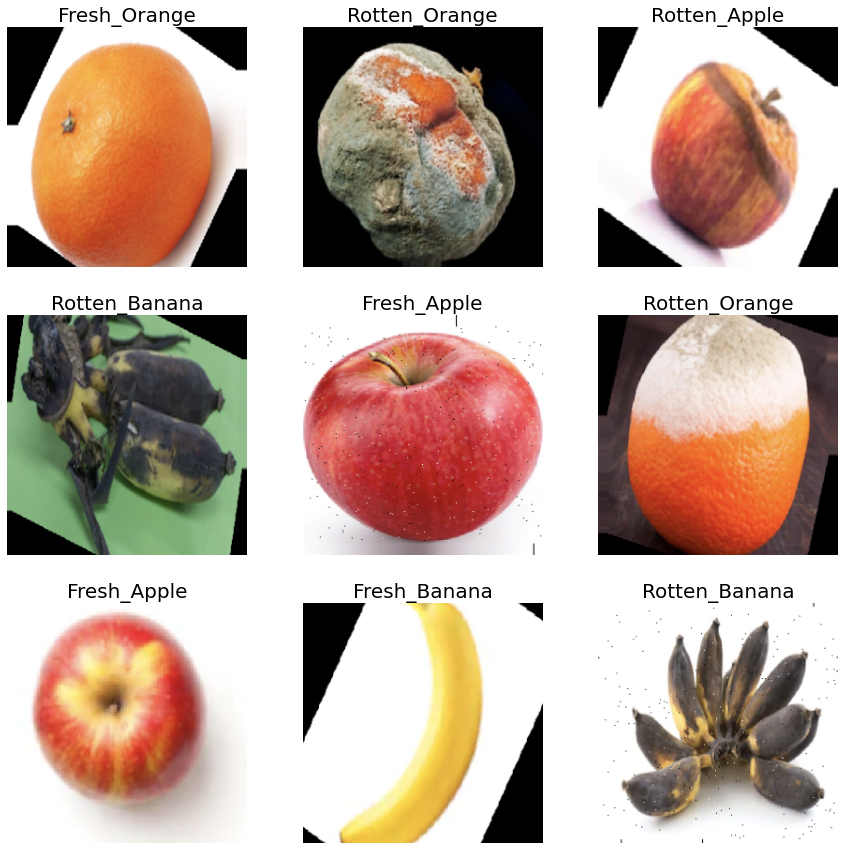

In [11]:
#checking train labels and images randomly

import matplotlib.pyplot as plt

train_set_check = train_datagen.flow_from_directory('Downloads/dataset/train',
                                             target_size=(256,256),
                                             batch_size=32,
                                             class_mode='sparse', shuffle=True)

plt.figure(figsize=(15, 15))

batch=next(train_set_check)  

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    img=batch[0][i]                            
    plt.imshow(img)
    lab = int(batch[1][i])
    plt.title(class_names[lab], fontsize=20)
    plt.axis("off")

In [12]:
epochs=10
history = model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=epochs,
  steps_per_epoch=500 
)

Epoch 1/10
500/500 [==============================] - 1321s 3s/step - loss: 0.4869 - acc: 0.7029 - val_loss: 0.2668 - val_acc: 0.9077
Epoch 2/10
500/500 [==============================] - 971s 2s/step - loss: 0.2107 - acc: 0.9130 - val_loss: 0.1884 - val_acc: 0.9325
Epoch 3/10
500/500 [==============================] - 1036s 2s/step - loss: 0.1667 - acc: 0.9273 - val_loss: 0.1433 - val_acc: 0.9503
Epoch 4/10
500/500 [==============================] - 1461s 3s/step - loss: 0.1122 - acc: 0.9555 - val_loss: 0.0921 - val_acc: 0.9663
Epoch 5/10
500/500 [==============================] - 875s 2s/step - loss: 0.0935 - acc: 0.9672 - val_loss: 0.1993 - val_acc: 0.9429
Epoch 6/10
500/500 [==============================] - 849s 2s/step - loss: 0.0959 - acc: 0.9629 - val_loss: 0.0732 - val_acc: 0.9737
Epoch 7/10
500/500 [==============================] - 872s 2s/step - loss: 0.0599 - acc: 0.9776 - val_loss: 0.0547 - val_acc: 0.9833
Epoch 8/10
500/500 [==============================] - 895s 2s/step

<Figure size 432x288 with 0 Axes>

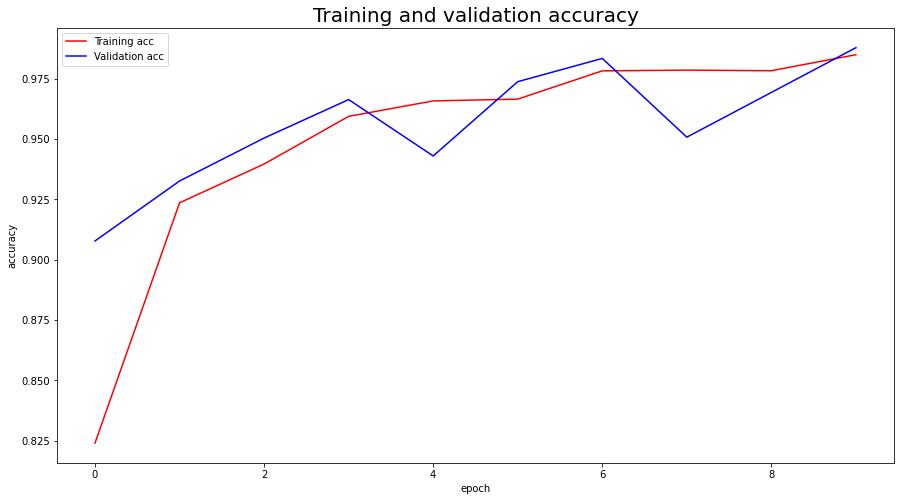

<Figure size 432x288 with 0 Axes>

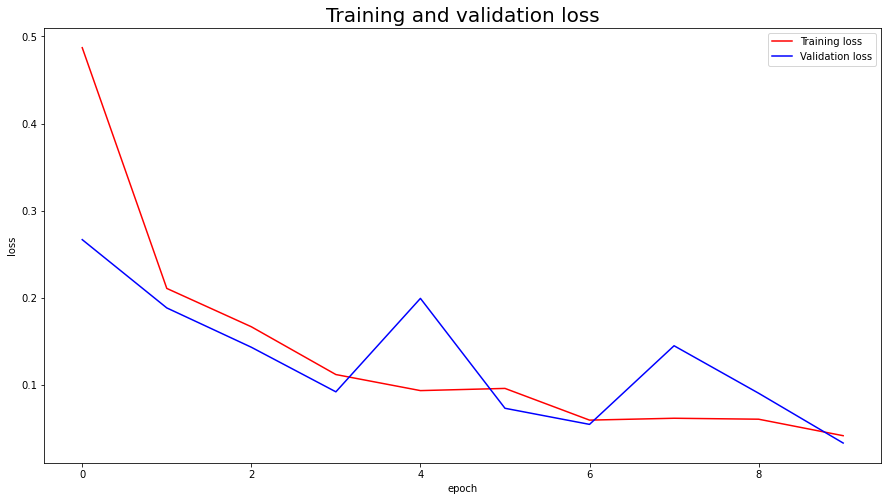

<Figure size 432x288 with 0 Axes>

In [13]:
#Graphing our training and validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15, 8))

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', fontsize=20)
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()


plt.figure(figsize=(15, 8))

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', fontsize=20)
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.figure()

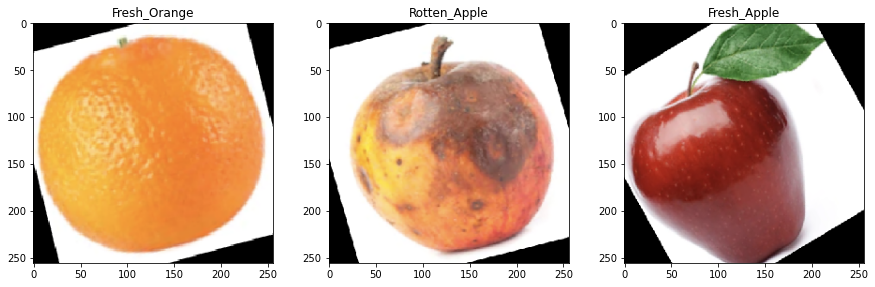

In [14]:
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np


img1 = image.load_img('3.png', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255

# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)

predictions = model.predict(img)

scores = np.exp(predictions[0])/np.sum(np.exp(predictions[0]))  

#print(predictions[0])
#print(scores)
#print(class_names[np.argmax(scores)])

predict_label = labels[np.argmax(scores)]
#print(predict_label)
value = float(scores[int(predict_label)]*100)

name_1 = class_names[int(predict_label)]

#img2
img2 = image.load_img('2.png', target_size=(256, 256))
img = image.img_to_array(img2)
img = img/255

# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
predictions = model.predict(img)

scores = np.exp(predictions[0])/np.sum(np.exp(predictions[0]))  
predict_label = labels[np.argmax(scores)]
value = float(scores[int(predict_label)]*100)

name_2 = class_names[int(predict_label)]

#img3
img3 = image.load_img('1.png', target_size=(256, 256))
img = image.img_to_array(img3)
img = img/255

# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)

predictions = model.predict(img)
scores = np.exp(predictions[0])/np.sum(np.exp(predictions[0]))  
predict_label = labels[np.argmax(scores)]

value = float(scores[int(predict_label)]*100)
name_3 = class_names[int(predict_label)]

plt.figure(figsize=(15, 15))
plt.subplot(3, 3, 1)
plt.title(name_1)
plt.imshow(img1)


plt.subplot(3, 3, 2)
plt.title(name_2)
plt.imshow(img2)


plt.subplot(3, 3, 3)
plt.title(name_3)
plt.imshow(img3)

In [15]:
classes = test_set.classes
print(classes)   

[0 0 0 ... 5 5 5]


In [16]:
import pandas as pd
test_set.reset

prediction = model.predict(test_set)

#print(prediction[0])
#print(len(prediction))

test_scores = np.exp(prediction)/np.sum(np.exp(prediction))  

#print(len(test_scores))
predict_labels = []

for i in range(0,len(test_scores)):
    x = np.argmax(test_scores[i])
    predict_labels.append(labels[x])

#print(predict_labels[0])    
#print(len(labels))    

df = pd.DataFrame({
   'filename': test_set.filenames,
   'original': classes,
   'predict' : predict_labels,
})

In [17]:
print("First 10 Images")
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.head(10)

First 10 Images


,filename,original,predict
0,freshapples/Screen Shot 2018-06-08 at 4.59.44 ...,0,0
1,freshapples/Screen Shot 2018-06-08 at 5.01.15 ...,0,0
2,freshapples/Screen Shot 2018-06-08 at 5.01.22 ...,0,0
3,freshapples/Screen Shot 2018-06-08 at 5.01.41 ...,0,0
4,freshapples/Screen Shot 2018-06-08 at 5.02.43 ...,0,0
5,freshapples/Screen Shot 2018-06-08 at 5.03.40 ...,0,0
6,freshapples/Screen Shot 2018-06-08 at 5.04.16 ...,0,0
7,freshapples/Screen Shot 2018-06-08 at 5.04.24 ...,0,0
8,freshapples/Screen Shot 2018-06-08 at 5.05.34 ...,0,0
9,freshapples/Screen Shot 2018-06-08 at 5.05.41 ...,0,0


In [18]:
print("Last 10 Images")
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.tail(10)

Last 10 Images


,filename,original,predict
2688,rottenoranges/vertical_flip_Screen Shot 2018-0...,5,5
2689,rottenoranges/vertical_flip_Screen Shot 2018-0...,5,5
2690,rottenoranges/vertical_flip_Screen Shot 2018-0...,5,5
2691,rottenoranges/vertical_flip_Screen Shot 2018-0...,5,5
2692,rottenoranges/vertical_flip_Screen Shot 2018-0...,5,5
2693,rottenoranges/vertical_flip_Screen Shot 2018-0...,5,5
2694,rottenoranges/vertical_flip_Screen Shot 2018-0...,5,5
2695,rottenoranges/vertical_flip_Screen Shot 2018-0...,5,5
2696,rottenoranges/vertical_flip_Screen Shot 2018-0...,5,5
2697,rottenoranges/vertical_flip_Screen Shot 2018-0...,5,5


In [19]:
df.predict = df.predict.astype(int)
df.original = df.original.astype(int)

<Figure size 432x288 with 0 Axes>

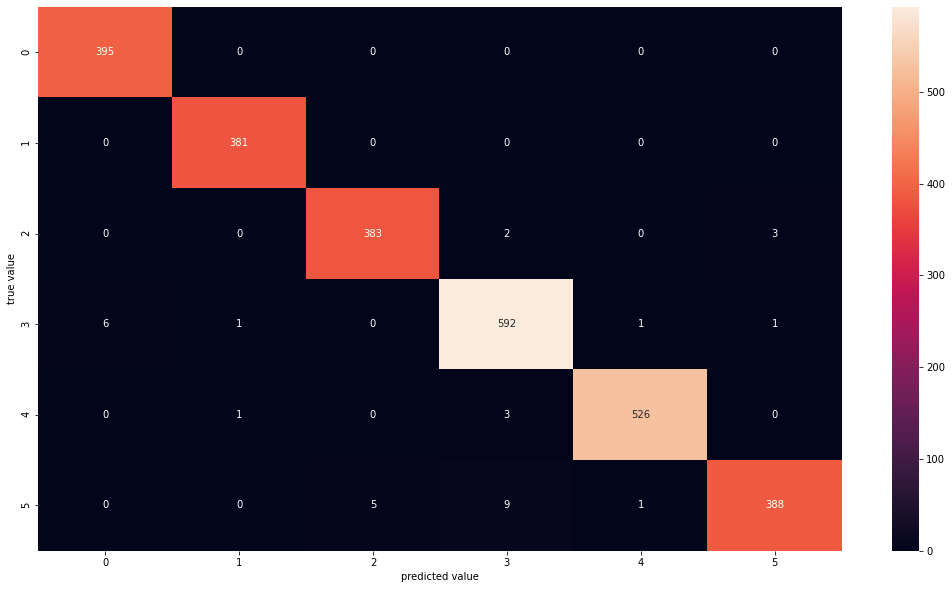

<Figure size 432x288 with 0 Axes>

In [20]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 10))

conf_matrix = confusion_matrix(df.original,df.predict)
sns.heatmap(conf_matrix,annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

plt.figure()

In [21]:
misclassified = df[df['original']!=df['predict']]
print('Total misclassified image from 2698 Validation images : %d'%misclassified['original'].count())

Total misclassified image from 2698 Validation images : 33


In [22]:
x1 = model.evaluate(train_set)
x2 = model.evaluate(test_set)

print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(x1[1]*100,x1[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(x2[1]*100,x2[0]))

85/85 [==============================] - 25s 300ms/step - loss: 0.0333 - acc: 0.9878
Training Accuracy  : 99.43%     Training loss  : 0.016609
Validation Accuracy: 98.78%     Validation loss: 0.033324
